In [1]:
# Import data
from keras.datasets import mnist
from matplotlib import pyplot as plt



Using TensorFlow backend.


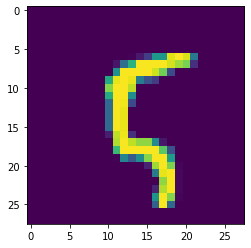

In [2]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

plt.imshow(X_train[100])
plt.show()

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [4]:
y_test[20]

9

In [5]:
# Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils


In [6]:
# (Flashback from optimimization algs notebook)

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    return model

model_dense = baseline_model()
model_dense.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history_dense = model_dense.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=32, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 - 11s - loss: 0.1991 - accuracy: 0.9406 - val_loss: 0.0937 - val_accuracy: 0.9717
Epoch 2/10
54000/54000 - 9s - loss: 0.0781 - accuracy: 0.9757 - val_loss: 0.0720 - val_accuracy: 0.9802
Epoch 3/10
54000/54000 - 10s - loss: 0.0507 - accuracy: 0.9839 - val_loss: 0.0776 - val_accuracy: 0.9773
Epoch 4/10
54000/54000 - 10s - loss: 0.0333 - accuracy: 0.9897 - val_loss: 0.0629 - val_accuracy: 0.9815
Epoch 5/10
54000/54000 - 11s - loss: 0.0262 - accuracy: 0.9909 - val_loss: 0.0752 - val_accuracy: 0.9813
Epoch 6/10
54000/54000 - 10s - loss: 0.0207 - accuracy: 0.9934 - val_loss: 0.0761 - val_accuracy: 0.9812
Epoch 7/10
54000/54000 - 9s - loss: 0.0147 - accuracy: 0.9953 - val_loss: 0.0757 - val_accuracy: 0.9820
Epoch 8/10
54000/54000 - 9s - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0779 - val_accuracy: 0.9830
Epoch 9/10
54000/54000 - 9s - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0871 - val_accuracy: 0.9815
Epoch 10/1

In [7]:
print(history_dense.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [8]:
model_dense.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


accuracy of the dense model =  0.98


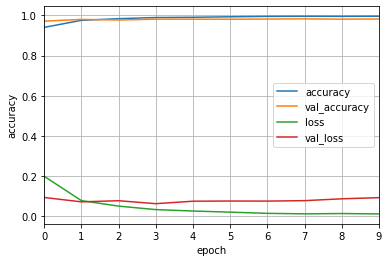

In [11]:
score = model_dense.evaluate(X_test, y_test, verbose=0)
print('accuracy of the dense model = ', round(score[1],2))

# summarize history for loss
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

In [12]:
# Preprocess input data for CNN model

# reload the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [13]:
# Preprocess class labels
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [14]:
#  Define model architecture
model = Sequential()
 
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flattening the 2D arrays for fully connected layers
model.add(Flatten()) 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [15]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [16]:
#  Fit model on training data
history_cnn = model.fit(X_train, Y_train,  validation_split=0.1,
          batch_size=32, epochs=10, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 - 13s - loss: 0.3582 - accuracy: 0.8919 - val_loss: 0.1114 - val_accuracy: 0.9662
Epoch 2/10
54000/54000 - 14s - loss: 0.1663 - accuracy: 0.9499 - val_loss: 0.0764 - val_accuracy: 0.9773
Epoch 3/10
54000/54000 - 14s - loss: 0.1248 - accuracy: 0.9623 - val_loss: 0.0702 - val_accuracy: 0.9810
Epoch 4/10
54000/54000 - 13s - loss: 0.1036 - accuracy: 0.9679 - val_loss: 0.0719 - val_accuracy: 0.9788
Epoch 5/10
54000/54000 - 12s - loss: 0.0904 - accuracy: 0.9716 - val_loss: 0.0652 - val_accuracy: 0.9815
Epoch 6/10
54000/54000 - 12s - loss: 0.0804 - accuracy: 0.9743 - val_loss: 0.0662 - val_accuracy: 0.9833
Epoch 7/10
54000/54000 - 12s - loss: 0.0726 - accuracy: 0.9767 - val_loss: 0.0632 - val_accuracy: 0.9827
Epoch 8/10
54000/54000 - 13s - loss: 0.0662 - accuracy: 0.9775 - val_loss: 0.0573 - val_accuracy: 0.9838
Epoch 9/10
54000/54000 - 13s - loss: 0.0628 - accuracy: 0.9793 - val_loss: 0.0630 - val_accuracy: 0.9857
Epoch 

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 28)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4732)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                151456    
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 152,066
Trainable params: 152,066
Non-trainable params: 0
________________________________________________

In [18]:
# list all data in history
print(history_cnn.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


accuracy of the cnn model =  0.98


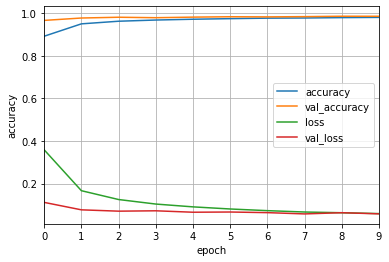

In [19]:
# summarize history for loss
score = model.evaluate(X_test, Y_test, verbose=0)
print('accuracy of the cnn model = ', round(score[1],2))

# summarize history for loss
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.xlim(0,9)
plt.grid()
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss', 'val_loss'], loc='best')
plt.show()

In [20]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=0)
score

[0.06278113232097239, 0.9832]